# Problem Statement

---
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

---
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

> __Supervised Linear regression__ [target variable is `Available` and is `Continuous`]

Data Understanding
---

In [1]:
# Import pandas library

import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
# Read 'day.csv' file

bk = pd.read_csv('day.csv')
bk

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


- `yr` column can be Renamed to _yr2019_

In [3]:
# Unique 'values' in columns

bk.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

>- `instant` & `dteday` have _Unique_ value for each row
>- `instant` : record index can be _Deleted_
>- `dteday` : date can be _Deleted_ [as other columns already derived from this]

- `season`, `mnth`, `weekday` & `weathersit` are non-boolean _Categorical_ columns

In [4]:
# check Info

bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


> no `NULL` _values_ in any column

In [5]:
# analyse Numerical column 

bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


> `registered` customers are in _double_ almost compared to `casual` customers

Data Manipulation
---

In [6]:
# data

bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# 'yr' column should Renamed to yr2019

bk.rename(columns={'yr':'yr2019'}, inplace=True)
bk

,instant,dteday,season,yr2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


- `yr` column Renamed to _yr2019_ [yr : year (0: 2018, 1:2019)]

In [8]:
# delete column 'instant' & 'dteday'

del bk['instant']
del bk['dteday']
bk.columns

Index(['season', 'yr2019', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

- `instant` & `dteday` columns _Deleted_

#### Categorical columns
---

In [9]:
# 'season' is categorical column

bk['season'] = bk['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}).astype('category')
bk['season'].unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

- season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [10]:
# 'mnth' is categorical column

bk['mnth'] = bk['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}).astype('category')
bk['mnth'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Apr', 'Aug', 'Dec', 'Feb', ..., 'May', 'Nov', 'Oct', 'Sep']

- mnth : month ( 1 to 12)

In [11]:
# find 'weekend' values

bk[(bk.workingday!=1) & (bk.holiday!=1)]['weekday'].unique()

array([6, 0], dtype=int64)

> `weekend` 
>- 0: Sun
>- 6: Sat

In [12]:
# 'weekday' is categorical column

bk['weekday'] = bk['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}).astype('category')
bk['weekday'].unique()

['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

- weekday : day of the week

In [13]:
# 'weathersit' is categorical column

bk['weathersit'] = bk['weathersit'].map({1:'Clear', 2:'Mist', 3:'Snow', 4:'Rain'}).astype('category')
bk['weathersit'].unique()

['Mist', 'Clear', 'Snow']
Categories (3, object): ['Clear', 'Mist', 'Snow']

- weathersit :
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

> `Rain` _weathersit_ have no data

Exploratory Data Analysis
---

In [14]:
# import EDA related libraries

import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')
sb.set_style("white")

In [15]:
# identify 'Numerical' columns

bk.columns

Index(['season', 'yr2019', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

<Axes: ylabel='registered'>

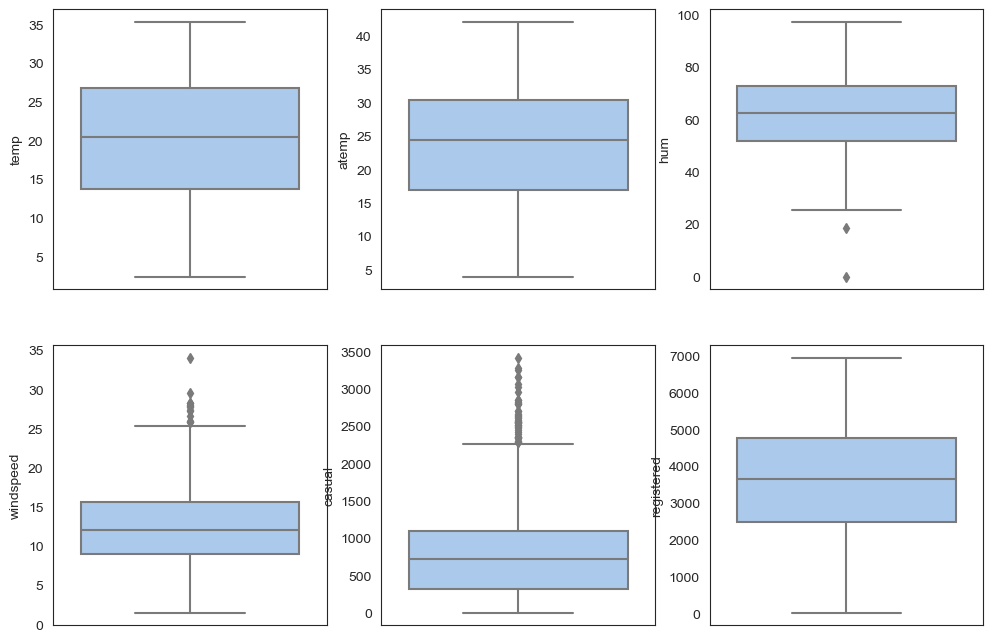

In [16]:
# Boxplots for 'Numerical' columns

fig1, axes1 = pt.subplots(2,3, figsize=(12,8))
sb.boxplot(data=bk, y='temp', palette='pastel', ax=axes1[0,0])
sb.boxplot(data=bk, y='atemp', palette='pastel', ax=axes1[0,1])
sb.boxplot(data=bk, y='hum', palette='pastel', ax=axes1[0,2])
sb.boxplot(data=bk, y='windspeed', palette='pastel', ax=axes1[1,0])
sb.boxplot(data=bk, y='casual', palette='pastel', ax=axes1[1,1])
sb.boxplot(data=bk, y='registered', palette='pastel', ax=axes1[1,2])

> Removal of the _Outliers_ will improve the `Scaling` ditribution in Linear regression Model

In [17]:
# function to remove the outliers

def Rm_Outlier(data, col):
    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = q3-q1
    low = q1-(1.5*iqr)
    high = q3+(1.5*iqr)
    data = data[(data[col] >= low) & (data[col] <= high)]
    return data

<Axes: ylabel='windspeed'>

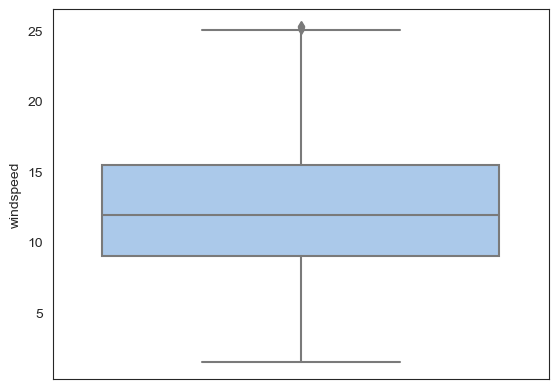

In [18]:
# Remove 'windspeed' Outliers

bk = Rm_Outlier(bk, 'windspeed')
sb.boxplot(data=bk, y='windspeed', palette='pastel')

- `windspeed` Outliers _removed_

<Axes: ylabel='casual'>

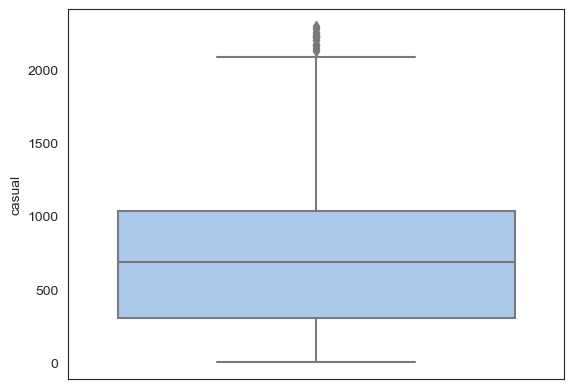

In [19]:
# Remove 'casual' Outliers

bk = Rm_Outlier(bk, 'casual')
sb.boxplot(data=bk, y='casual', palette='pastel')

<Axes: ylabel='casual'>

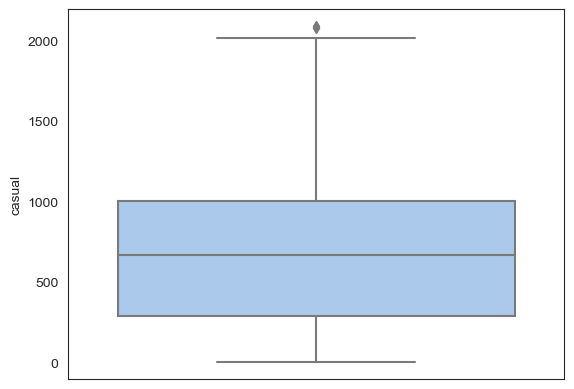

In [20]:
# Remove 'casual' Outliers again

bk = Rm_Outlier(bk, 'casual')
sb.boxplot(data=bk, y='casual', palette='pastel')

- `casual` Outliers _removed_

<Axes: >

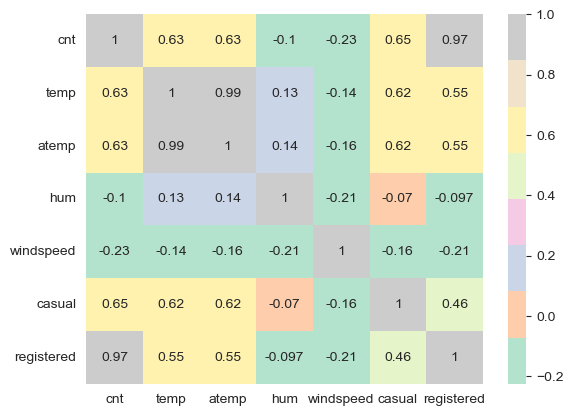

In [21]:
# Heatmap for 'Numerical' columns

cr = bk[['cnt','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']].corr()
sb.heatmap(cr, annot = True, cmap = 'Pastel2')

>- `registered` & `casual` columns are part of 'cnt' -> ignore in _Linear Regression_ [not Features]
>- `temp` & `atemp` have ___High___ _Multicollinearity_
>- `windspeed` have ___Low___ _Negative_ corelation with `cnt`

In [22]:
# delete column 'casual' & 'registered'

del bk['casual']
del bk['registered']
bk.columns

Index(['season', 'yr2019', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

- `registered` & `casual` columns _deleted_

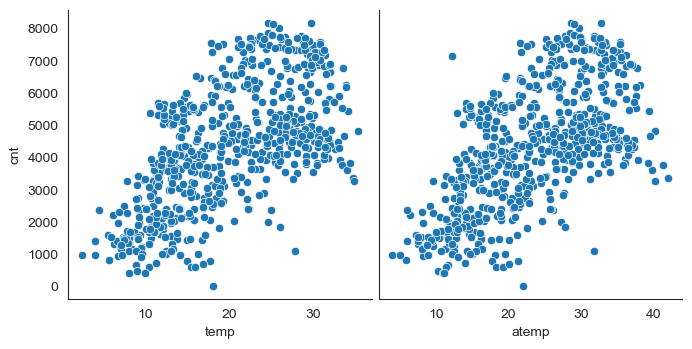

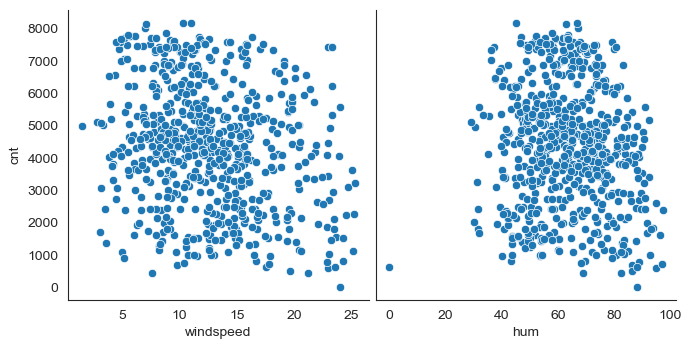

In [23]:
# Pairplots for 'Numerical' columns

sb.pairplot(data=bk, y_vars='cnt', x_vars=['temp', 'atemp',], size=3.5)
sb.pairplot(data=bk, y_vars='cnt', x_vars=['windspeed', 'hum'], size=3.5)

> `temp` & `atemp` have HIGH _Positive_ correlation with `cnt`

<Axes: xlabel='weathersit', ylabel='cnt'>

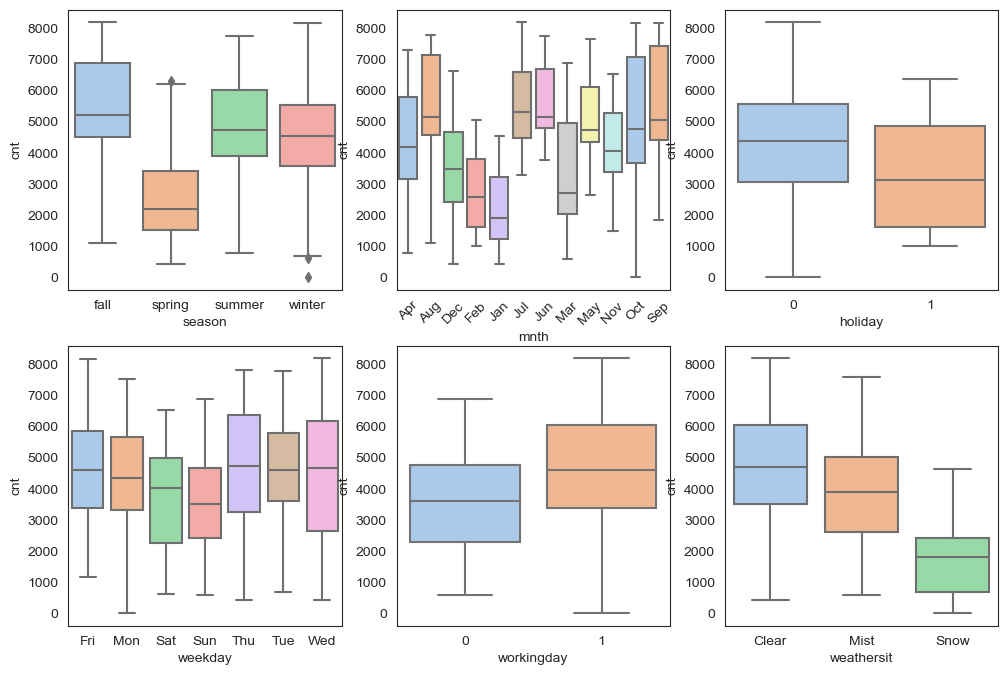

In [24]:
# Boxplots for 'Categorical' columns

fig1, axes1 = pt.subplots(2,3, figsize=(12,8))
axes1[0,1].tick_params(axis='x', rotation=45)
sb.boxplot(data=bk, y='cnt', x='season', palette='pastel', ax=axes1[0,0])
sb.boxplot(data=bk, y='cnt', x='mnth', palette='pastel', ax=axes1[0,1])
sb.boxplot(data=bk, y='cnt', x='holiday', palette='pastel', ax=axes1[0,2])
sb.boxplot(data=bk, y='cnt', x='weekday', palette='pastel', ax=axes1[1,0])
sb.boxplot(data=bk, y='cnt', x='workingday', palette='pastel', ax=axes1[1,1])
sb.boxplot(data=bk, y='cnt', x='weathersit', palette='pastel', ax=axes1[1,2])

>- `Snow` _weathersit_ has ___Low___ demand
>- `holiday` has _Slightly-Low_ demand
>- `spring` _season_ has ___Low___ demand
>- `workingday` has _Slightly-High_ demand

<Axes: xlabel='season', ylabel='cnt'>

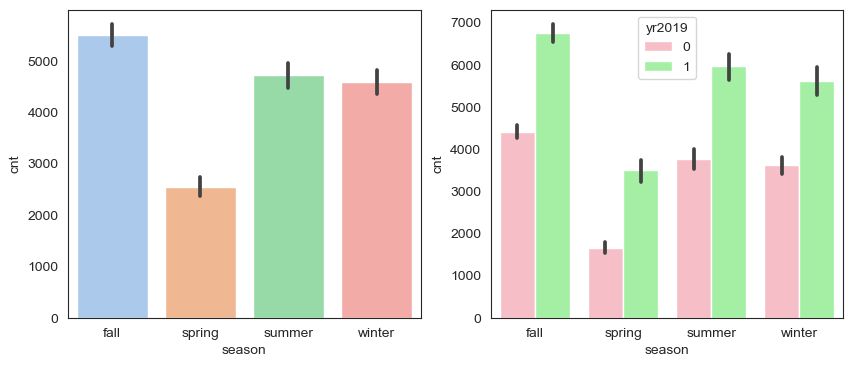

In [25]:
# Barplots for Categorical column 'season'

fig2, axes2 = pt.subplots(1,2, figsize=(10,4))
sb.barplot(data=bk, y='cnt', x='season', palette='pastel', ax=axes2[0])
sb.barplot(data=bk, y='cnt', x='season', palette=['lightpink','palegreen'], ax=axes2[1], hue='yr2019')

> `spring` season has _Low_ demand compared to other seasons

<Axes: xlabel='weathersit', ylabel='cnt'>

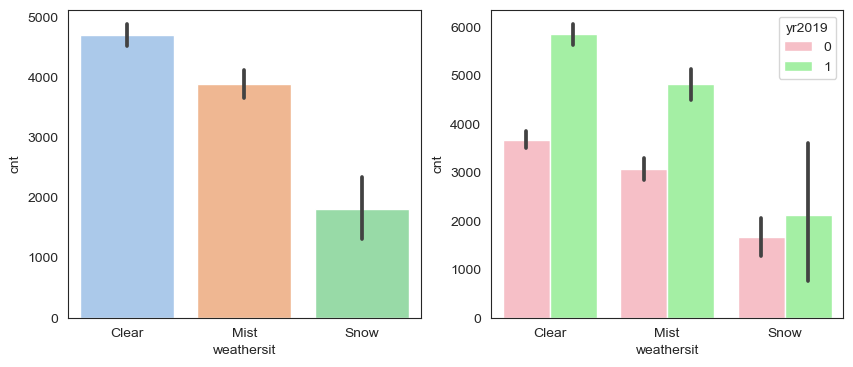

In [26]:
# Barplots for Categorical column 'weathersit'

fig2, axes2 = pt.subplots(1,2, figsize=(10,4))
sb.barplot(data=bk, y='cnt', x='weathersit', palette='pastel', ax=axes2[0])
sb.barplot(data=bk, y='cnt', x='weathersit', palette=['lightpink','palegreen'], ax=axes2[1], hue='yr2019')

>- `Clear` weathersit has ___High___ demand [_Clear, Few clouds, Partly cloudy, Partly cloudy_]
>- `Mist` weathersit has ___Medium___ demand [_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist_]
>- `Snow` weathersit has ___Low___ demand [_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds_]
>- `Rain` weathersit has ___No___ demand [_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog_]

<Axes: xlabel='holiday', ylabel='cnt'>

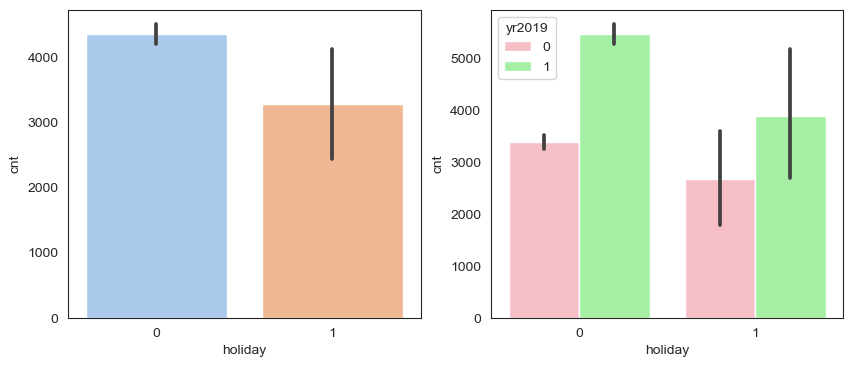

In [27]:
# Barplots for Categorical column 'holiday'

fig2, axes2 = pt.subplots(1,2, figsize=(10,4))
sb.barplot(data=bk, y='cnt', x='holiday', palette='pastel', ax=axes2[0])
sb.barplot(data=bk, y='cnt', x='holiday', palette=['lightpink','palegreen'], ax=axes2[1], hue='yr2019')

> `holiday` has _Low_ demand 

<Axes: xlabel='workingday', ylabel='cnt'>

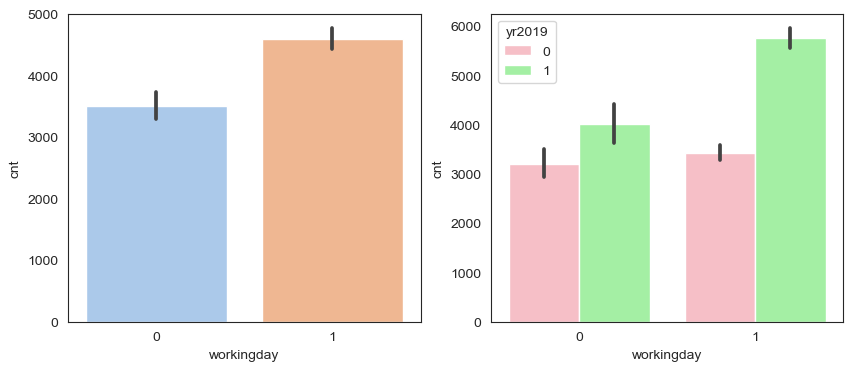

In [28]:
# Barplots for Categorical column 'workingday'

fig2, axes2 = pt.subplots(1,2, figsize=(10,4))
sb.barplot(data=bk, y='cnt', x='workingday', palette='pastel', ax=axes2[0])
sb.barplot(data=bk, y='cnt', x='workingday', palette=['lightpink','palegreen'], ax=axes2[1], hue='yr2019')

> `workingday` has _High_ demand 

<Axes: xlabel='weekday', ylabel='cnt'>

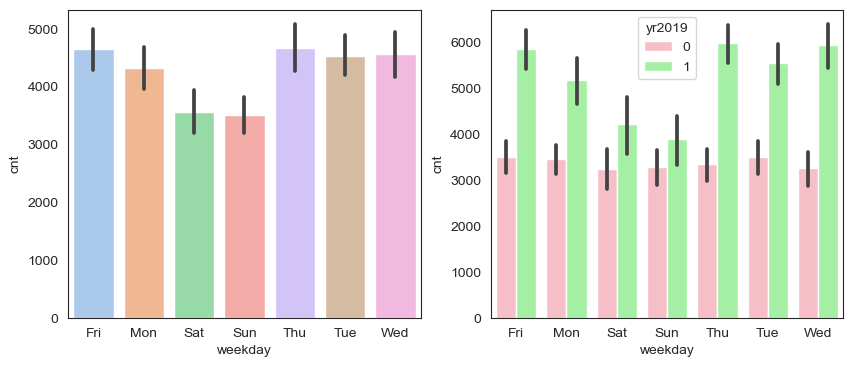

In [29]:
# Barplots for Categorical column 'workingday'

fig2, axes2 = pt.subplots(1,2, figsize=(10,4))
sb.barplot(data=bk, y='cnt', x='weekday', palette='pastel', ax=axes2[0])
sb.barplot(data=bk, y='cnt', x='weekday', palette=['lightpink','palegreen'], ax=axes2[1], hue='yr2019')

> `weekend` has _Low_ demand

<Axes: xlabel='mnth', ylabel='cnt'>

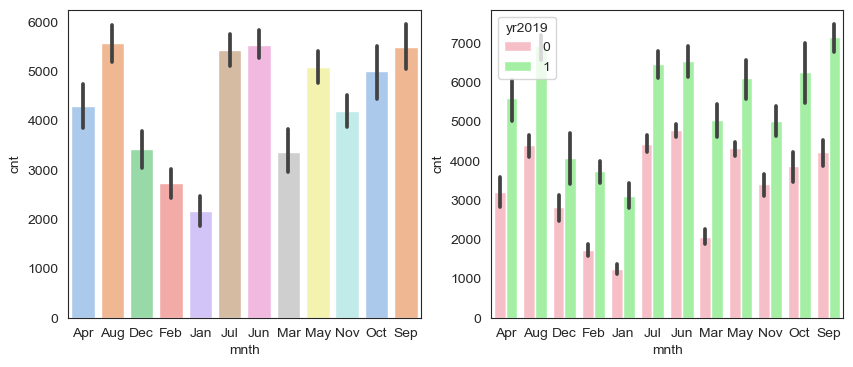

In [30]:
# Barplots for Categorical column 'mnth'

fig2, axes2 = pt.subplots(1,2, figsize=(10,4))
sb.barplot(data=bk, y='cnt', x='mnth', palette='pastel', ax=axes2[0])
sb.barplot(data=bk, y='cnt', x='mnth', palette=['lightpink','palegreen'], ax=axes2[1], hue='yr2019')

- `Mid-Year` has _High_ demand

<Axes: xlabel='yr2019', ylabel='cnt'>

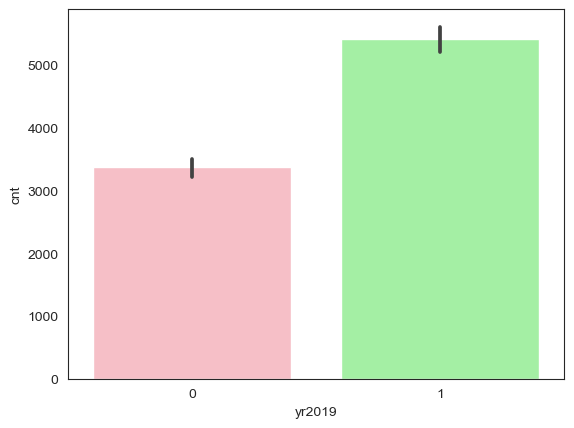

In [31]:
# Barplots for Categorical column 'yr2019'

sb.barplot(data=bk, y='cnt', x='yr2019', palette=['lightpink','palegreen'])

> `2019` had _High_ demand

Date Preparation
---

In [32]:
# Get 'Categorical' columns assigned

bk.select_dtypes(include='category')

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,Mist
1,spring,Jan,Sun,Mist
2,spring,Jan,Mon,Clear
3,spring,Jan,Tue,Clear
4,spring,Jan,Wed,Clear
...,...,...,...,...
725,spring,Dec,Thu,Mist
726,spring,Dec,Fri,Mist
727,spring,Dec,Sat,Mist
728,spring,Dec,Sun,Clear


In [33]:
# Create 'dummies'

bk = pd.get_dummies(bk, dtype=int, drop_first=True)
bk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr2019           657 non-null    int64  
 1   holiday          657 non-null    int64  
 2   workingday       657 non-null    int64  
 3   temp             657 non-null    float64
 4   atemp            657 non-null    float64
 5   hum              657 non-null    float64
 6   windspeed        657 non-null    float64
 7   cnt              657 non-null    int64  
 8   season_spring    657 non-null    int32  
 9   season_summer    657 non-null    int32  
 10  season_winter    657 non-null    int32  
 11  mnth_Aug         657 non-null    int32  
 12  mnth_Dec         657 non-null    int32  
 13  mnth_Feb         657 non-null    int32  
 14  mnth_Jan         657 non-null    int32  
 15  mnth_Jul         657 non-null    int32  
 16  mnth_Jun         657 non-null    int32  
 17  mnth_Mar         657 

- `dummies` created for _Categoral_ columns

# Linear Regression
---
### _scikit-learn_

In [34]:
# import 'scikit-learn' related modules

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [35]:
# Split 'train' & 'test' data

bk_train, bk_test = train_test_split(bk, train_size=0.7, test_size=0.3, random_state=96)

In [36]:
# 'train' data shape

bk_train.shape

(459, 30)

In [37]:
# 'test' data shape

bk_test.shape

(198, 30)

Data Normalisation
---

In [38]:
# Get 'Normalization' columns

nor_col = (pd.concat([bk.select_dtypes(include='float64'),bk.cnt], axis=1)).columns
nor_col

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [39]:
# MinMaxScaler 

scaler = MinMaxScaler()
bk_train[nor_col] = scaler.fit_transform(bk_train[nor_col])
bk_test[nor_col] = scaler.transform(bk_test[nor_col])
bk_train.describe()

,yr2019,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,0.468410,0.026144,0.742919,0.538301,0.506088,0.650257,0.465946,0.523959,0.259259,0.233115,0.259259,0.084967,0.102397,0.074074,0.100218,0.078431,0.087146,0.080610,0.067538,0.084967,0.091503,0.067538,0.165577,0.108932,0.122004,0.154684,0.141612,0.154684,0.339869,0.041394
std,0.499546,0.159737,0.437501,0.234916,0.216043,0.146787,0.206216,0.231970,0.438706,0.423276,0.438706,0.279137,0.303500,0.262177,0.300618,0.269143,0.282357,0.272532,0.251225,0.279137,0.288638,0.251225,0.372106,0.311894,0.327648,0.361998,0.349032,0.361998,0.474181,0.199418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341803,0.322136,0.540575,0.315578,0.349282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.511625,0.495297,0.642335,0.438845,0.529628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750538,0.692171,0.754830,0.593562,0.676359,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- `train` data set _Normalised_

Model Building
---

In [40]:
# Split train & test data:

# target variable 'cnt'
y_train = bk_train.pop('cnt')
y_test = bk_test.pop('cnt')

# dependent variables
X_train = bk_train
X_test = bk_test

In [41]:
# train data 'Linear Regression' model

sk = LinearRegression()
sk.fit(X_train, y_train)
sk.score(X_train, y_train)

0.8521978988253485

>- `R-squared` ___85.2%___

In [42]:
# Select 'features' using RFE

rfe = RFE(sk, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

- Maximun ___12___ _Features_ selected by which `VIF restricts to max 2-Digit`

In [43]:
# RFE Feature Ranking

pd.DataFrame({'Features' : X_train.columns, 'Support': rfe.support_,  'Rank' : rfe.ranking_}).sort_values(by='Rank', ascending=True)

,Features,Support,Rank
0,yr2019,True,1
20,mnth_Sep,True,1
27,weathersit_Mist,True,1
9,season_winter,True,1
7,season_spring,True,1
6,windspeed,True,1
14,mnth_Jul,True,1
28,weathersit_Snow,True,1
1,holiday,True,1
3,temp,True,1


In [44]:
# Generic function to calculate 'VIF' of variables [Multi Colinearity]

def calcVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [45]:
# Run the function to calculate 'VIF' for the model

X_rfe = X_train[X_train.columns[rfe.support_]]
calcVIF(X_rfe)

,Features,VIF
4,hum,22.20
3,temp,15.13
5,windspeed,5.16
2,workingday,4.27
6,season_spring,2.74
10,weathersit_Mist,2.17
7,season_winter,2.15
0,yr2019,1.93
8,mnth_Jul,1.44
11,weathersit_Snow,1.34


### _statsmodels_

In [46]:
# import 'statsmodels' related module

import statsmodels.api as sm

In [47]:
# Generic function to calculate 'OLS' [Linear Regression]

def OLS_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

---
`Model-I`

In [48]:
# Building '1st' linear regression model

lr_1 = OLS_fit(y_train,X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     200.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.39e-171
Time:                        18:56:18   Log-Likelihood:                 445.45
No. Observations:                 459   AIC:                            -864.9
Df Residuals:                     446   BIC:                            -811.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3131      0.035     

>- `R-squared` ___84.3%___
>- `Adj. R-squared` ___83.9%___

- `holiday` has _Slight_ P-value ___0.001___ [Slightly Insignificant]

In [49]:
# As 'holiday' shows slightly high P-values, hence we can drop it..
X_rfe = X_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate 'VIF' for the new model
calcVIF(X_rfe)

,Features,VIF
3,hum,22.13
2,temp,15.09
4,windspeed,5.16
1,workingday,3.98
5,season_spring,2.72
9,weathersit_Mist,2.16
6,season_winter,2.15
0,yr2019,1.93
7,mnth_Jul,1.43
10,weathersit_Snow,1.33


---
`Model-II`

In [50]:
# Building '2nd' linear regression model

lr_2 = OLS_fit(y_train,X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          8.53e-170
Time:                        18:56:18   Log-Likelihood:                 439.80
No. Observations:                 459   AIC:                            -855.6
Df Residuals:                     447   BIC:                            -806.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3025      0.035     

>- `R-squared` ___84.0%___
>- `Adj. R-squared` ___83.6%___

- `mnth_Sep` has _Slight_ P-value ___0.001___ [Slightly Insignificant]

In [51]:
# As 'mnth_Sep' shows slight P-values compared to others, hence we can drop it..
X_rfe = X_rfe.drop(['mnth_Sep'], axis = 1)

# Run the function to calculate 'VIF' for the new model
calcVIF(X_rfe)

,Features,VIF
3,hum,21.95
2,temp,14.91
4,windspeed,5.06
1,workingday,3.98
5,season_spring,2.70
8,weathersit_Mist,2.16
6,season_winter,2.13
0,yr2019,1.92
7,mnth_Jul,1.40
9,weathersit_Snow,1.33


---
`Model-III`

In [52]:
# Building '3rd' linear regression model

lr_3 = OLS_fit(y_train,X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     227.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.42e-168
Time:                        18:56:18   Log-Likelihood:                 434.08
No. Observations:                 459   AIC:                            -846.2
Df Residuals:                     448   BIC:                            -800.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2926      0.035     

>- `R-squared` ___83.5%___
>- `Adj. R-squared` ___83.2%___

-  All _Features_ are `Significant` as P-values are ___0.000___

In [53]:
# 'Model-III' Co-efficients

lr_3.params

const              0.292587
yr2019             0.225301
workingday         0.065871
temp               0.510777
hum               -0.148234
windspeed         -0.109698
season_spring     -0.114705
season_winter      0.062005
mnth_Jul          -0.088547
weathersit_Mist   -0.058600
weathersit_Snow   -0.242129
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

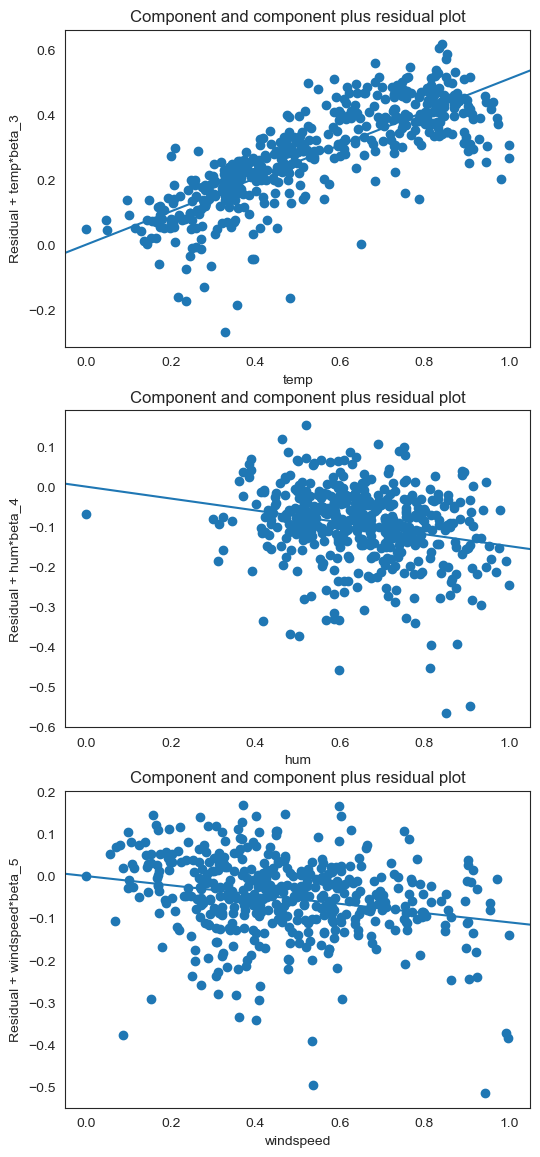

In [54]:
# 'Numerical' coefficient Params plot

fig3, axes3 = pt.subplots(3,1, figsize=(6,14))
sm.graphics.plot_ccpr(lr_3, 'temp', ax=axes3[0])
sm.graphics.plot_ccpr(lr_3, 'hum', ax=axes3[1])
sm.graphics.plot_ccpr(lr_3, 'windspeed', ax=axes3[2])
pt.show

>- Demand of bikes _Positively_ HIGH depend on `temp`
>- Demand of bikes _Negatively_ depend on `hum`
>- Demand of bikes _Negatively_ depend on `windspeed`

<function matplotlib.pyplot.show(close=None, block=None)>

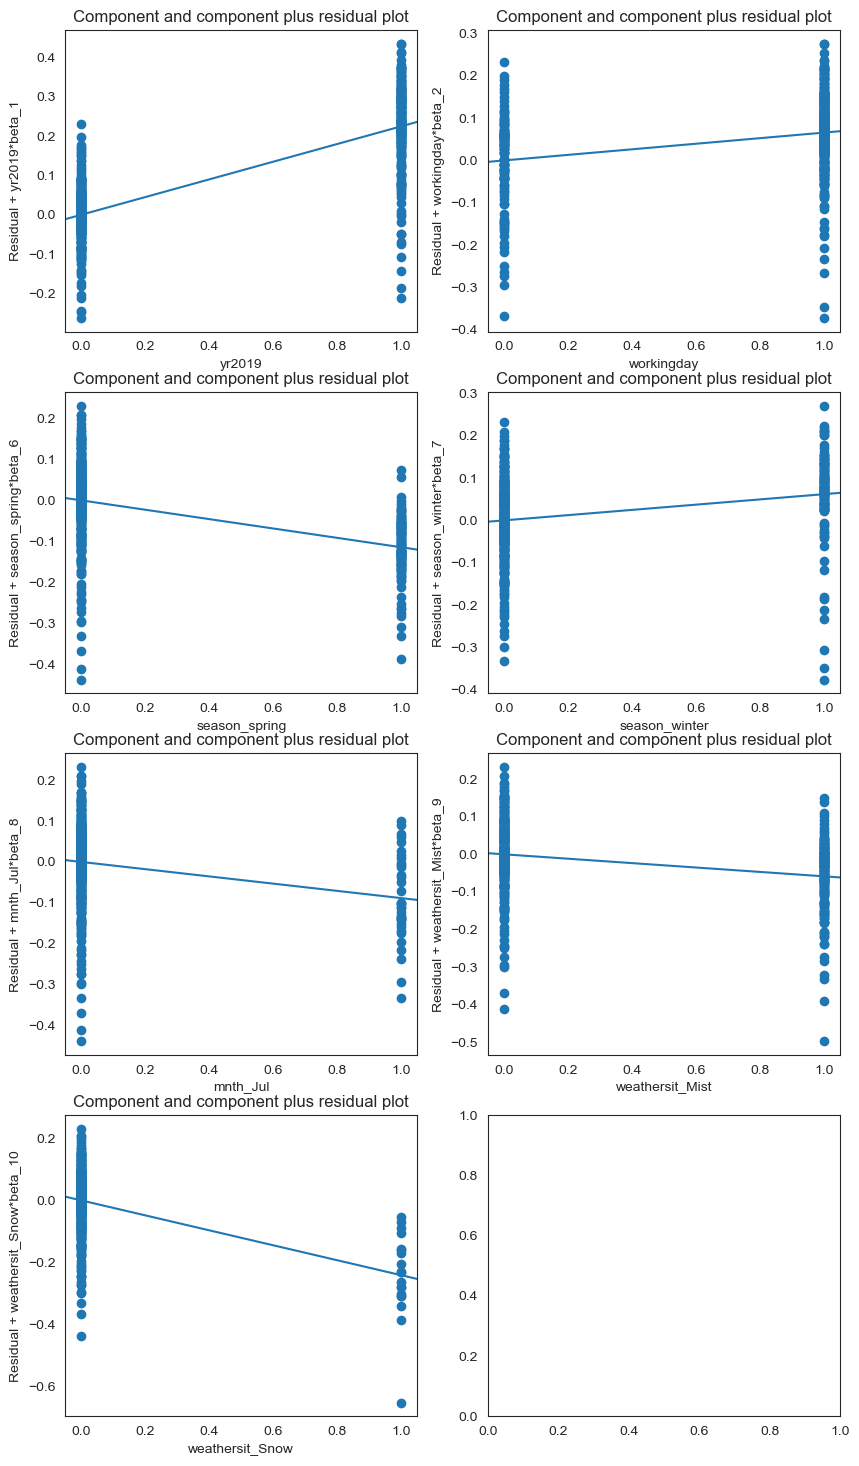

In [55]:
# 'Categorical' coefficient Params plot

fig4, axes4 = pt.subplots(4,2, figsize=(10,18))
sm.graphics.plot_ccpr(lr_3, 'yr2019', ax=axes4[0,0])
sm.graphics.plot_ccpr(lr_3, 'workingday', ax=axes4[0,1])
sm.graphics.plot_ccpr(lr_3, 'season_spring', ax=axes4[1,0])
sm.graphics.plot_ccpr(lr_3, 'season_winter', ax=axes4[1,1])
sm.graphics.plot_ccpr(lr_3, 'mnth_Jul', ax=axes4[2,0])
sm.graphics.plot_ccpr(lr_3, 'weathersit_Mist', ax=axes4[2,1])
sm.graphics.plot_ccpr(lr_3, 'weathersit_Snow', ax=axes4[3,0])
pt.show

<ins>Categorical dependent variable Inference:</ins>

<div style="display: inline-block">

|Demand|_Positively_|_Negatively_|
|--:|:--:|:--:|
|yr2019:|___HIGH___|-|
|workingday:|___LOW___|-|
|season_spring:|-|___LOW___|
|season_winter:|___LOW___|-|
|mnth_Jul:|-|___LOW___|
|weathersit_Mist:|-|___LOW___|
|weathersit_Snow:|-|___HIGH___|
     
</div>

<Axes: >

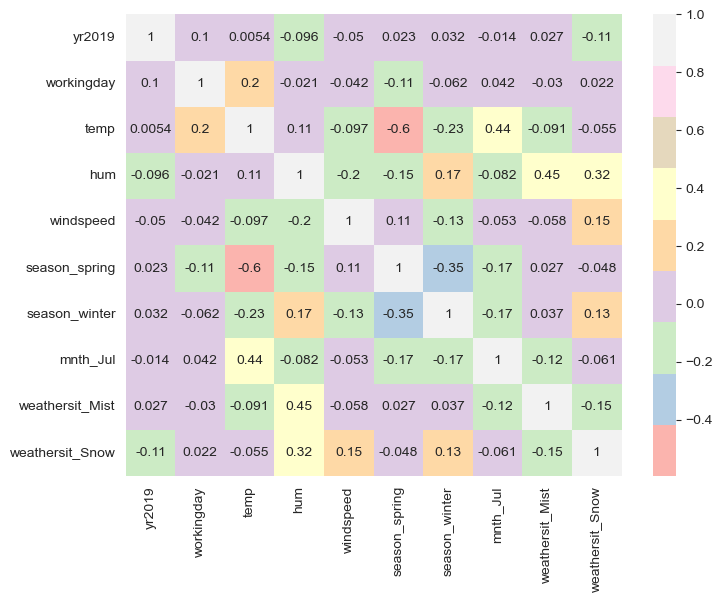

In [56]:
# 'heatmap' for Correlation check

pt.figure(figsize=(8,6))
sb.heatmap(X_rfe.corr(), annot = True, cmap="Pastel1")

> `temp` & `season_spring` have Negative Corellation of _0.6_

Model Evaluation
---

In [57]:
# Calculating r2_score value for the 'train' dataset

X_train = sm.add_constant(X_train[X_rfe.columns])
y_train_pred = lr_3.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
r2

0.8354962885602473

> `R-squared` ___83.5%___

In [58]:
# Calculating Adjusted-R^2 value for the 'train' dataset

adjusted_r2 = round(1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2

0.8314

> `Adj. R-squared` ___83.1%___

Text(0.5, 0, 'train data Residuals')

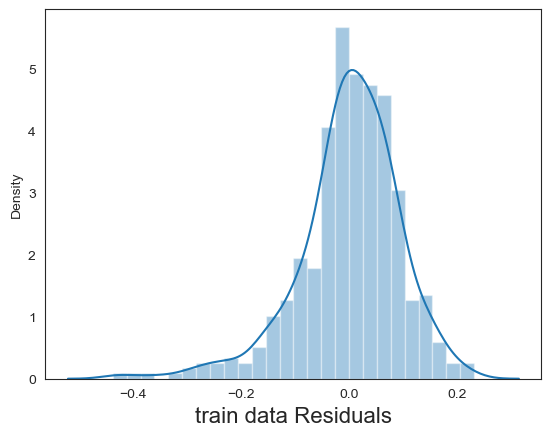

In [59]:
# plot 'train' data Residuals

res_train = y_train-y_train_pred
sb.distplot(res_train)
pt.xlabel('train data Residuals', fontsize=16)

> _Train_ data Residual terms are following `Normal distribution`

Text(0.5, 1.0, 'train data Residuals [Q-Q_Plot]')

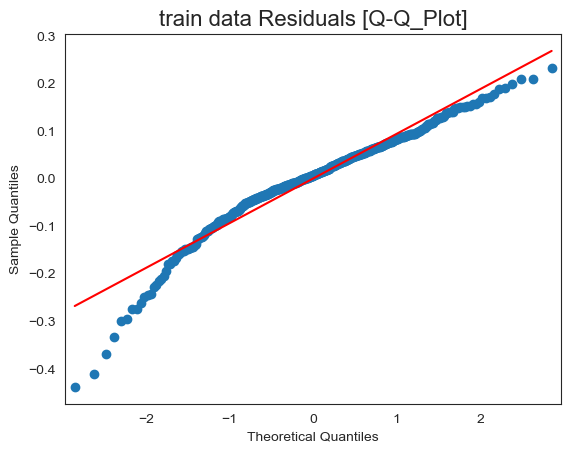

In [60]:
# Q-Q Plot for 'train' data Residuals

sm.qqplot(res_train, line='s') 
pt.title('train data Residuals [Q-Q_Plot]', fontsize=16)

> theoretical quantiles of a `Normal distribution`, are getting almost a _Straight line_ [train data Residuals]

Text(0, 0.5, 'train data Residuals')

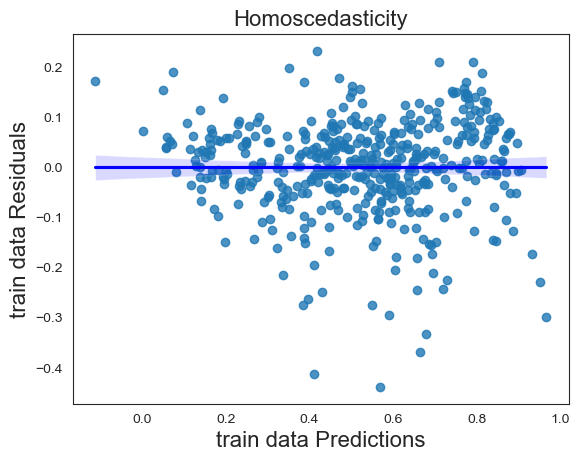

In [61]:
# Homoscedasticity plot for 'train' data Residuals

sb.regplot(x=y_train_pred, y=res_train, line_kws={"color": "b"})
pt.title('Homoscedasticity', fontsize=16)
pt.xlabel('train data Predictions', fontsize=16)
pt.ylabel('train data Residuals', fontsize=16)

> Homoskedasticity, the variance of the _train_ data Residual terms are almost `Similar`

Text(0, 0.5, 'y_train_pred')

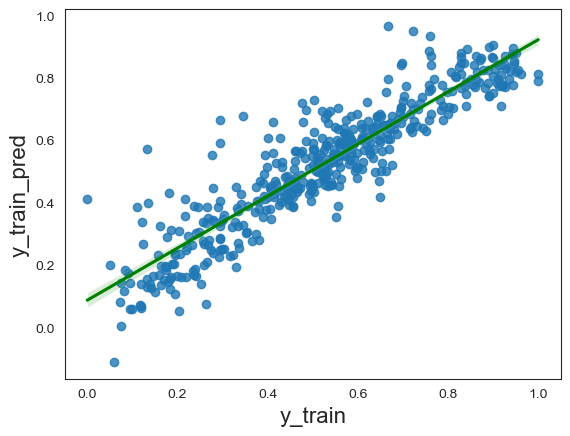

In [62]:
# y_train vs y_train_pred plot

sb.regplot(x=y_train, y=y_train_pred, line_kws={"color": "g"})
pt.xlabel('y_train', fontsize=16)
pt.ylabel('y_train_pred', fontsize=16)

> This seems to be a good _Model_ that can very well `Generalize` various datasets

Model Prediction
---

In [63]:
# Calculating r2_score value for the 'test' dataset

X_test = sm.add_constant(X_test[X_rfe.columns])
y_test_pred = lr_3.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
r2

0.8533511609696693

> `R-squared` ___85.3%___

In [64]:
# Calculating Adjusted-R^2 value for the 'test' dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_r2

0.8447

> `Adj. R-squared` ___84.4%___

Text(0.5, 0, 'test data Residuals')

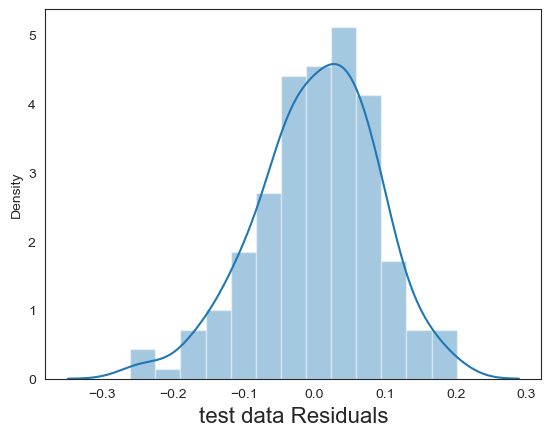

In [65]:
# plot 'test' data Residuals

res_test = y_test-y_test_pred
sb.distplot(res_test)
pt.xlabel('test data Residuals', fontsize=16)

> _Test_ data Residual terms are followed `Normal distribution`

Text(0.5, 1.0, 'test data Residuals [Q-Q_Plot]')

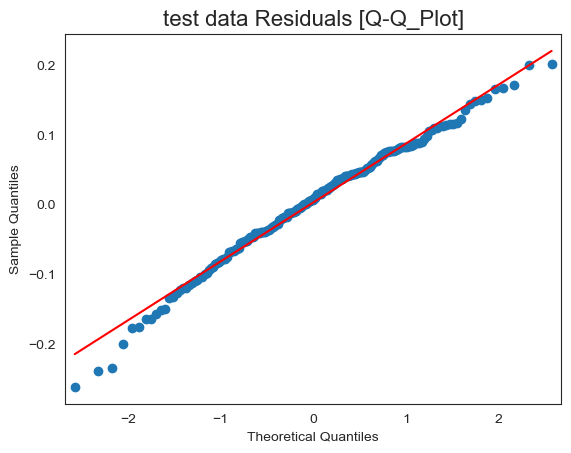

In [66]:
# Q-Q plot for 'test' data Residuals

sm.qqplot(res_test, line='s') 
pt.title('test data Residuals [Q-Q_Plot]', fontsize=16)

> theoretical quantiles of a `normal distribution`, were got almost a _Straight line_ [test data Residuals]

Text(0, 0.5, 'test data Residuals')

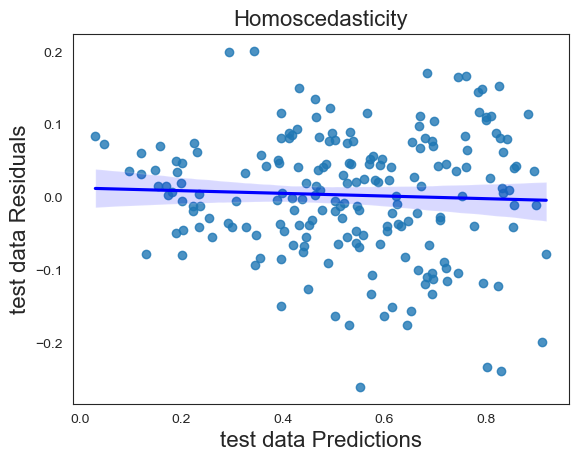

In [67]:
# Homoscedasticity plot for 'test' data Residuals

sb.regplot(x=y_test_pred, y=res_test, line_kws={"color": "b"})
pt.title('Homoscedasticity', fontsize=16)
pt.xlabel('test data Predictions', fontsize=16)
pt.ylabel('test data Residuals', fontsize=16)

> Homoskedasticity, the variance of the _test_ data Residual terms are almost `Similar`

Text(0, 0.5, 'y_test_pred')

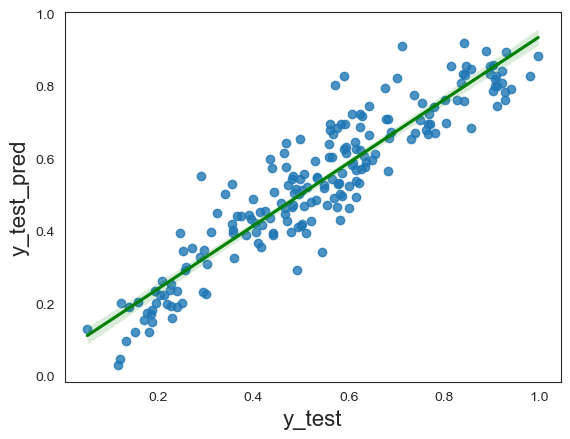

In [68]:
# y_test vs y_test_pred plot

sb.regplot(x=y_test, y=y_test_pred, line_kws={"color": "g"})
pt.xlabel('y_test', fontsize=16)
pt.ylabel('y_test_pred', fontsize=16)

> This seems to be a Really good that very well `Generalized` the _test_ data

<ins>R^2 Comparision:</ins>

<div style="display: inline-block">

|Model|_Train_|_Test_|
|--:|:--:|:--:|
|R-squared:|___83.5%___|__85.3%__|
|Adj. R-squared:|___83.1%___|__84.4%__| 
    
</div>

> `Model Predictions` are more than the _Expected!_